## Ekman transport

by Spencer Jones (spencerj@ldeo.columbia.edu), with some code from Ryan Abernathey (thanks for releasing the code under an MIT open license).

Imagine the water column as a pile of layers, with wind blowing over the surface:

<img src="layer_wind.png" alt="Image of 5 layers with an arrow showing wind blowing across the top layer" width="300">

Wind exerts a stress on the ocean. The symbol for this stress is $\tau$, and its units are N/m$^2$ (also called Pa). 

In the top layer, the force diagram looks approximately like this:

<img src="force_layer1.png" alt="Force balance diagram for top layer" width="400">

In the next layer down, the drag from the layer above is in the same direction as the velocity in the layer above

<img src="force_layera2.png" alt="Force balance diagram for second layer" width="500">

This happens at every level, with the lower layer moving slower and to the right of the layer above it:

<img src="spirala.png" alt="Ekman spiral" width="500">

Eventually, as we go deeper, the velocity goes to 0 at a depth that we call $z=-\delta$. We would like to know the net direction of the flow over the whole layer above this.

<img src="ekman_layer.png" alt="Ekman layer" width="500">

In the Ekman layer, the balance is between the Coriols force and drag (viscosity):

\begin{equation}
-f v_{Ek}=\nu \frac{\partial^2 u}{\partial z ^2} \, , 
\end{equation}

\begin{equation}
f u_{Ek}=\nu \frac{\partial^2 v}{\partial z ^2} \, , 
\end{equation}

where $f$ is the Coriolis parameter and $\nu$ is the viscosity. 

Now we want to integrate these equations vertically over the whole Ekman layer, i.e. between $-\delta$ and $0$.
\begin{equation}
\int_{-\delta}^0 -f v_{Ek} \, dz=\int_{-\delta}^0 \nu \frac{\partial^2 u}{\partial z ^2}\, dz \, , 
\end{equation}

\begin{equation}
\int_{-\delta}^0 f u_{Ek} \, dz=\int_{-\delta}^0 \nu \frac{\partial^2 v}{\partial z ^2}\, dz \, , 
\end{equation}

What we care about is the depth-integrated ekman transport:

\begin{equation}
U_{Ek}=\int_{-\delta}^0 u_{Ek} \, dz
\end{equation}

\begin{equation}
V_{Ek}=\int_{-\delta}^0 v_{Ek} \, dz
\end{equation}

and $f$ is not a function of depth, so, 

\begin{equation}
\int_{-\delta}^0 -f v_{Ek} \, dz=-fV_{Ek}=\int_{-\delta}^0 \nu \frac{\partial^2 u}{\partial z ^2}\, dz \, , 
\end{equation}

\begin{equation}
\int_{-\delta}^0 f u_{Ek} \, dz=fU_{Ek}=\int_{-\delta}^0 \nu \frac{\partial^2 v}{\partial z ^2}\, dz \, , 
\end{equation}

Remember, if you integrate a derivative of $A$, you just evaluate the $A$ at each end of the integral, like this:
\begin{equation}
\int_{-\delta}^0 \frac{\partial A}{\partial z} \, dz= \left[A\right]_{-\delta}^0=\left.A\right|_{z=-\delta}-\left.A\right|_{z=0}
\end{equation}

So, 
\begin{equation}
-fV_{Ek}= \nu \left( \left.\frac{\partial u}{\partial z}\right|_{z=-\delta}-\left.\frac{\partial u}{\partial z}\right|_{z=0}\right) \, , 
\end{equation}

\begin{equation}
fU_{Ek}=\nu \left(\left.\frac{\partial v}{\partial z}\right|_{z=-\delta}-\left.\frac{\partial v}{\partial z}\right|_{z=0}\right) \, , 
\end{equation}



$\frac{\partial u}{\partial z}$ and $\frac{\partial v}{\partial z}$ are **stresses**. At the bottom of the Ekman layer, these stresses are zero, so

\begin{equation}
\left.\frac{\partial v}{\partial z}\right|_{z=0}=0
\end{equation}

\begin{equation}
\left.\frac{\partial u}{\partial z}\right|_{z=0}=0
\end{equation}

At the top of the Ekman layer, these stresses are set by the wind, so

\begin{equation}
\nu \left.\frac{\partial u}{\partial z}\right|_{z=-\delta}=\tau^{(x)}/\rho_0
\end{equation}

\begin{equation}
\nu \left.\frac{\partial v}{\partial z}\right|_{z=-\delta}=\tau^{(y)}/\rho_0
\end{equation}

Hence, when we put everything together, 
\begin{equation}
-fV_{Ek}= \tau^{(x)}/\rho_0 \, , 
\end{equation}

\begin{equation}
fU_{Ek}= \tau^{(y)}/\rho_0 \, , 
\end{equation}

The **key point** here is the $\tau^{(x)}$ is the wind stress in the x-direction, so if the wind blows eastward, in the Northern Hemisphere, the transport will be southward. In fact, the direction of the Ekman transport is 90$^{\circ}$ to the right of the wind direction in the Northern Hemisphere and 90$^{\circ}$ to the left of the wind direction in the Southern Hemisphere. 

<img src="ekman_righta.png" alt="Ekman right" width="500">

Below, I load some wind data and calculate the Ekman transport from it

In [ ]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#download some wind data
scow = xr.open_dataset('http://wilson.coas.oregonstate.edu:8080/thredds/dodsC/CIOSS/SCOW/Monthly/scow_monthly_maps.nc')
scow

<xarray.Dataset>
Dimensions:                      (latitude: 560, longitude: 1440, time: 12)
Coordinates:
  * latitude                     (latitude) float32 -69.875 -69.625 ... 69.875
  * longitude                    (longitude) float32 0.125 0.375 ... 359.875
  * time                         (time) datetime64[ns] 2001-01-01 ... 2001-12-01
Data variables:
    scow_wind_curl               (time, longitude, latitude) float32 ...
    scow_wind_divergence         (time, longitude, latitude) float32 ...
    scow_wind_stress_curl        (time, longitude, latitude) float32 ...
    scow_wind_stress_divergence  (time, longitude, latitude) float32 ...
    scow_zonal_wind_stress       (time, longitude, latitude) float32 ...
    scow_meridional_wind_stress  (time, longitude, latitude) float32 ...
    scow_wind_stress_magnitude   (time, longitude, latitude) float32 ...
    scow_zonal_wind              (time, longitude, latitude) float32 ...
    scow_meridional_wind         (time, longitude, latitu

In [4]:
# create an annual mean -- takes a long time to load data
scow_am = scow.mean(dim='time').load()
ds = scow_am.transpose('latitude', 'longitude')

/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
omega = 7.29e-5
f = 2 * omega * np.sin(np.deg2rad(ds.latitude))
rho0 = 1030
ds['U_ek'] = ds.scow_meridional_wind_stress / (rho0 * f).where(abs(ds.latitude)>5)
ds['V_ek'] = -ds.scow_zonal_wind_stress / (rho0 * f).where(abs(ds.latitude)>5)

In [7]:
def quick_quiver(u, v, sampling_x=10, sampling_y=10, mag_max=None, **kwargs):
    x = u.longitude
    y = u.latitude
    mag = 0.5*(u**2 + v**2)**0.5
    slx = slice(None, None, sampling_x)
    sly = slice(None, None, sampling_y)
    sl2d = (sly, slx)
    fig, ax = plt.subplots(**kwargs)
    mag.plot(ax=ax, vmax=mag_max)
    return ax, ax.quiver(x[slx], y[sly], u[sl2d], v[sl2d])

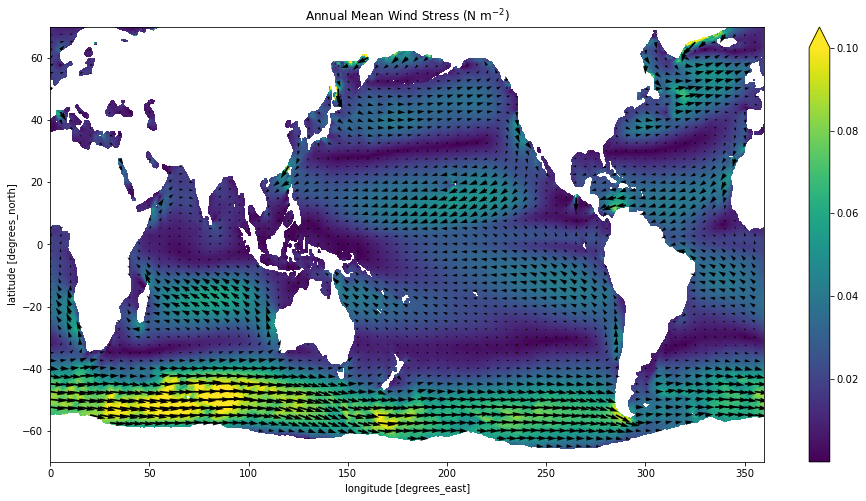

In [8]:
quick_quiver(ds.scow_zonal_wind_stress, ds.scow_meridional_wind_stress,
             mag_max=0.1, sampling_x=20, figsize=(16,8))
plt.title(r'Annual Mean Wind Stress (N m$^{-2}$)');

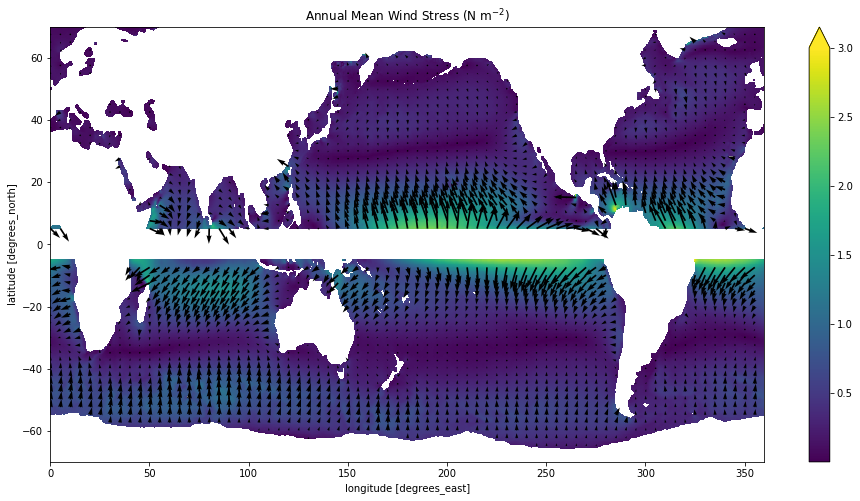

In [14]:
quick_quiver(ds['U_ek'], ds['V_ek'],
             mag_max=3, sampling_x=20, figsize=(16,8))
plt.title(r'Annual Mean Wind Stress (N m$^{-2}$)');